# BBB Customer Analysis

## Preprocessing

In [1]:
import gender_guesser.detector as gender
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import sys
if '..' not in sys.path:
    sys.path.append('..')
from catools import *

In [11]:
# Bring the data together in a single df
df1 = pd.read_csv("items-2016-03-06-2017-03-07.csv")
df2 = pd.read_csv("items-2017-03-06-2018-03-07.csv")
df = pd.concat([df1, df2])
df = df.drop(['Time Zone', 'Category', 'Price Point Name', 'SKU', 'Modifiers Applied', 'Gross Sales',
       'Discounts', 'Payment ID', 'Device Name', 'Details',
       'Event Type', 'Dining Option', 'Customer Reference ID',], axis=1)
df.head()

names_df = pd.read_csv('export-20180306-190210.csv')

In [3]:
# Turn net sales into a float
df['Net Sales'] = df['Net Sales'].replace('[\$,]', '', regex=True).astype(float)

## Repeat Customers

33.33% of transactions involve repeat customers


/home/wlifferth/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


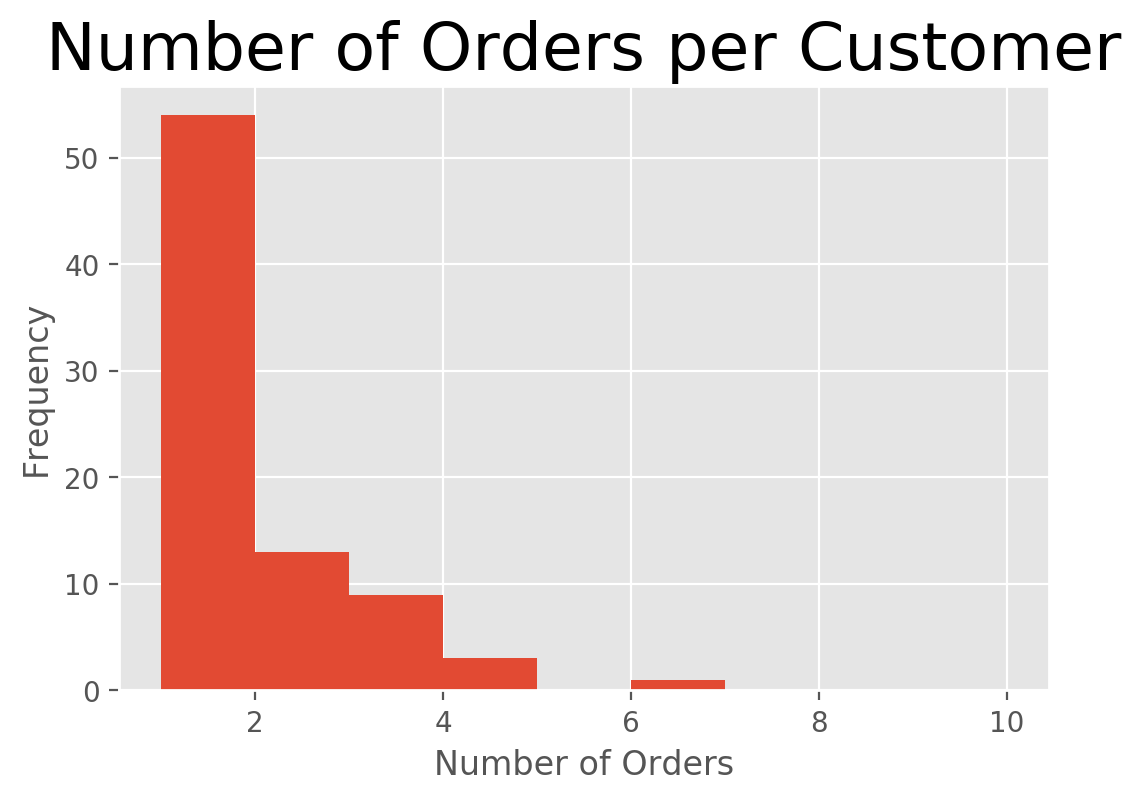

In [4]:
purchase_frequency(df['Customer ID'].values)

## Gender Breakdown

In [12]:
names_df.head()

,Reference ID,First Name,Last Name,Email Address,Phone Number,Nickname,Company Name,Street Address 1,Street Address 2,City,...,Birthday,Memo,Square Customer ID,Creation Source,First Visit,Last Visit,Transaction Count,Total Spend,Email Unsubscribed,Instant Profile
0,NaN,Adam,Mew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NQ15VYSW3S3DMHQ0Q5PP5ZBFHG,Instant Profile (via Payment),2018-03-03,2018-03-03,1,$80.00,No,Yes
1,NaN,Adrienne,Walker,amw7u@mtmail.mtsu.edu,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,M5VRVX3ATS3VV1Y9BMRY2J1448,Directory,NaN,NaN,0,0,No,No
2,NaN,Alana,Rodgers-Tipton,mrsrodgerstipton@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,KZDQ54T5YX5VMTPBN66369PCAC,Merge,2016-12-15,2016-12-15,1,$15.00,No,No
3,NaN,Alexis,Mcghee,Lexmcghee15@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GX3XJP21X95Z96DZGP8SQYG650,Directory,2017-12-01,2017-12-01,1,$107.00,No,No
4,NaN,Alexus,Moore,monshanique@icloud.com,(865) 454-9292,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,HE3AR9ZDGX5SB48XNKSTJE4JM4,Directory,2017-04-22,2017-04-22,1,$42.61,No,No


Out of 107 total customers:
	5 cusomters were Male
	48 cusomters were Female
	54 cusomters were Andro/Unknown


/home/wlifferth/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


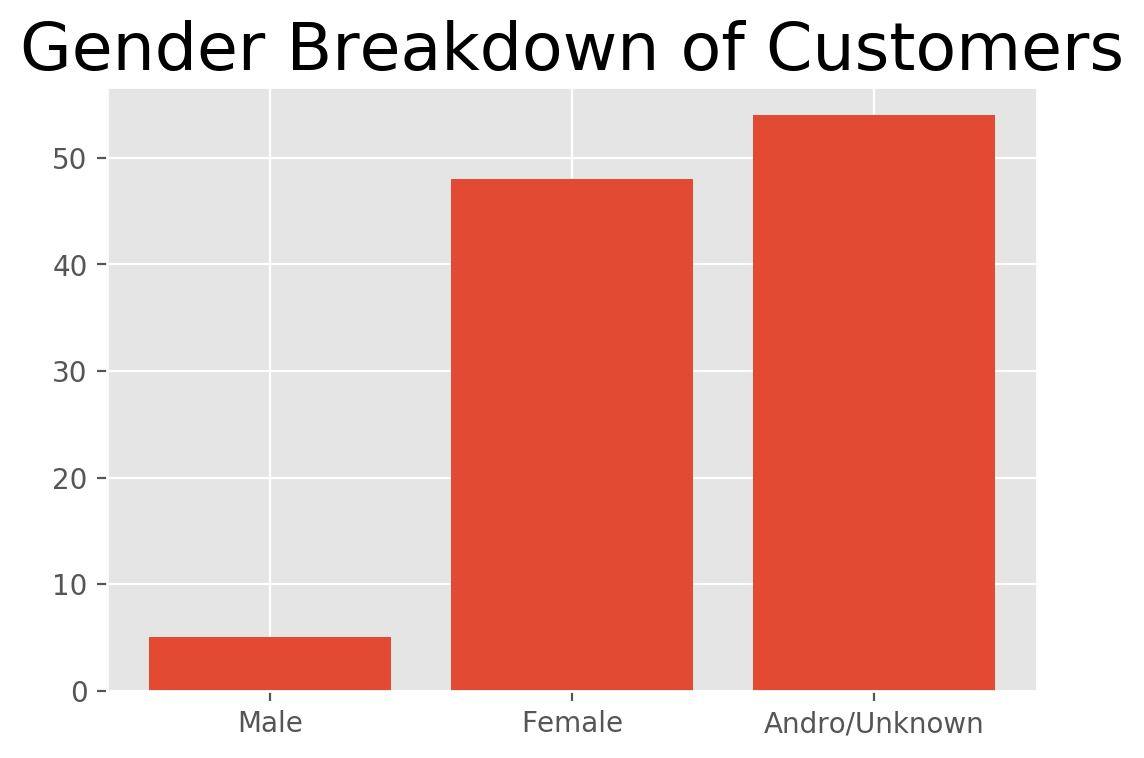

In [13]:
gender_breakdown(names_df['First Name'].values)

## Average Purchase

DescribeResult(nobs=167, minmax=(0.0, 275.0), mean=50.31712574850299, variance=2236.4334820503573, skewness=2.5381628433090277, kurtosis=7.744503216252889)


/home/wlifferth/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


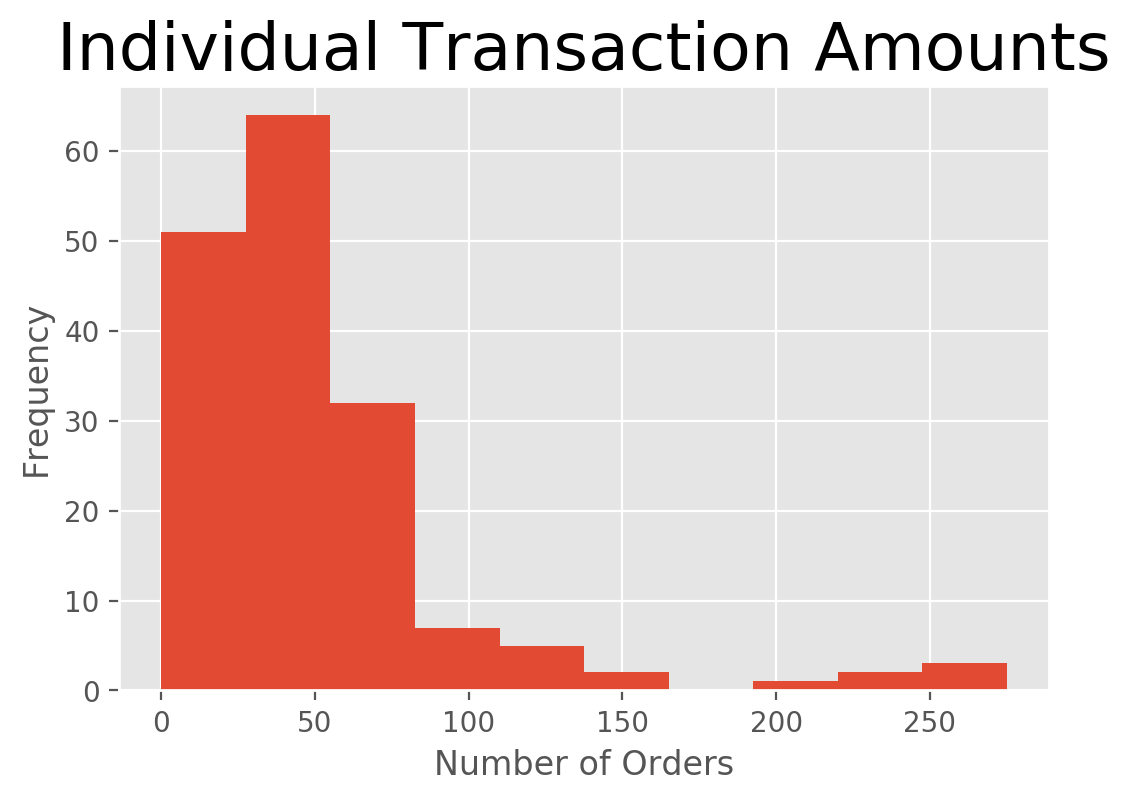

In [6]:
average_purchase(df['Net Sales'])

## Lifetime Value of Customer

Your avaerage customer is worth $103.74024691358024 over their lifetime.


/home/wlifferth/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


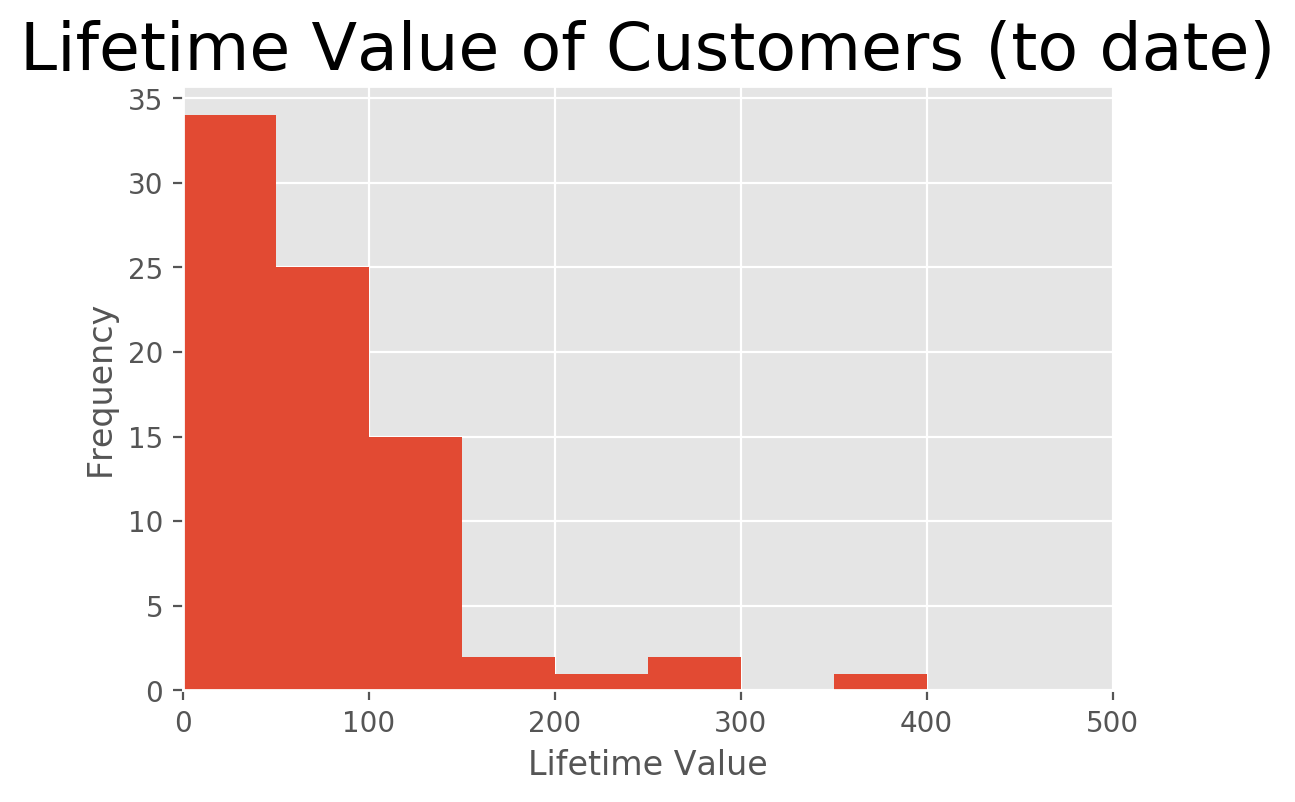

In [10]:
lifetime_value(df['Customer ID'].values, df['Net Sales'].values, bounds=[0, 500], bins=[i * 50 for i in range(10)])